# Центральная предельная теорема своими руками

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import semicircular
%matplotlib inline

## Полукруговое распределение Вигнера

В качестве непрерывного распределения я выбрал полукруговое распределение Вигнера. Для которого плотность вероятности задаётся следующей формулой:
                                    $\rho(x) = \frac2{\pi R^2}\sqrt{R^2 - x^2}$
                                    
Реализация полукругового распределения Вигнера в библиотеке scipy имеет по умолчанию значение радиуса $R = 1$.

Дисперсия $D = \frac{R^2}4$, т.е. в нашем случае $D = \frac14$.
Среднее $E = 0$, причём 0 равны как математическое ожидание, так и медиана и мода.

Узнать больше об полукруговом распределении Вигнера можно здесь: https://en.wikipedia.org/wiki/Wigner_semicircle_distribution, а также из документации scipy: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.semicircular.html#scipy.stats.semicircular

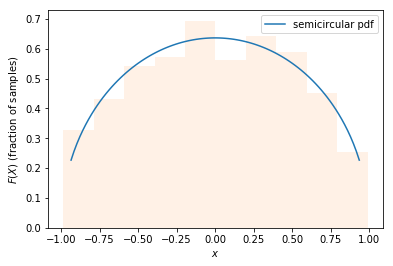

In [44]:
#определяем массив точек для построения теоритической плотности распределения
#далее будем использовать также для построения плотности нормальных распределении
x = np.linspace(semicircular.ppf(0.01), semicircular.ppf(0.99), 100)
#строим на графике теоретическую плотность распределения
plt.plot(x, semicircular.pdf(x), label = 'semicircular pdf')

#теперь генерируем 1000 случайных значений и строим гистрограмму выборки
r = semicircular.rvs(size = 1000)
plt.hist(r, density = True, histtype = 'stepfilled', alpha = 0.1)
plt.legend(loc = 'best')

#подпишем оси для большей наглядности
plt.ylabel('$F(X)$ (fraction of samples)')
plt.xlabel('$x$')

plt.show()

#заметим, что теоритическая плотность распределения хорошо приближает гистограмму нашей выборки

## Распределение выборочного среднего случайной величины

Оценим распределение выборочного среднего нашей случайной величины при разных объёмах выборок. Проведем 3 эксперимента с объёмами выборок 5, 10 и 50. Во избежании дублирования кода, я использую цикл с тремя итерациями соответсвующими трём объёмам выборок.

Для n = 5:


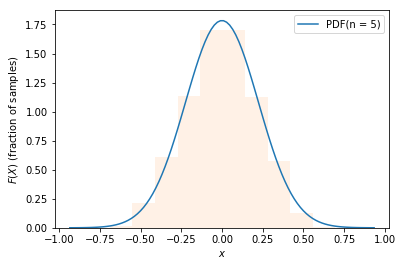

Для n = 10:


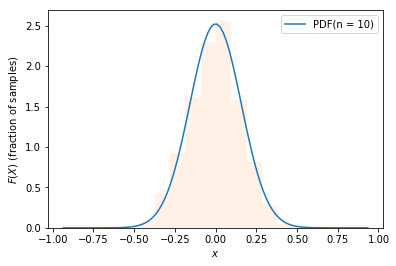

Для n = 50:


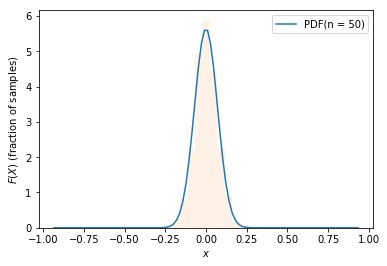

In [45]:
volumes = [5, 10, 50] #используемые в нашем эксперименте значения n

for n in volumes:
    n_sample = np.array([]) #массив выборочных средних
    
    print('Для n = ' + str(n) + ':')
    
    for i in xrange(0, 1000): #в этом цикле генерируем массив выборочных средних
        temp_n_sample = semicircular.rvs(size = n) #генерация выборки размера n
        mean = np.sum(temp_n_sample) / n #определение выборочного среднего (в.с.)
        n_sample = np.append(n_sample, mean) #добавляем в массив новое значение в.с.
    
    D = 0.25 #дисперсия полукругового распределения, как было сказано ранее, равна 1/4
    D_n = D / n #дисперсия нормального распределения, которым приближается распределение выборочных средних
    E = 0 #среднее значение полукругового распределения равно 0 
    sigma_n = np.sqrt(D_n) #среднеквадратическое отклонение нормального распределения
    
    norm_n = sts.norm(E, sigma_n) #определяем нормальное распределение с нашими расчётными характеристиками
    pdf_n = norm_n.pdf(x) #находим плотность распределения
    
    #строим плотность нормального распределения и гистограмму выборочных средних
    plt.plot(x, pdf_n, label = 'PDF(n = ' + str(n) + ')')
    plt.hist(n_sample, density = True, histtype = 'stepfilled', alpha = 0.1)
    
    plt.ylabel('$F(X)$ (fraction of samples)')
    plt.xlabel('$x$')
    plt.legend(loc='best')
    plt.show()
    

Как мы можем заметить, нормальное распределение с расчётными характеристиками полукругового Вигнера хорошо приближает гистограмму выборочных средних даже при $n = 5$, увеличивая точность приближения с увеличением $n$. Это результат того, что график теоритической плотности полукругого распределения Вигнера симметричен и не скошен. В противном случае, заметного приближения нам удалось бы достичь только при достаточно больших $n$.